<a href="https://colab.research.google.com/github/kaanbaycan/IE-423-Forecasting-Tasks/blob/main/IE_423_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
def upload_dataset(from_drive = False):
  if not os.path.exists("kaggle.json"):
    if not from_drive:
      print("Upload Kaggle API Key")
      files.upload()
      print("Downloading dataset...")
    else:
      !cp /content/drive/MyDrive/kaggle.json /content/
    !mkdir -p ~/.kaggle
    !cp kaggle.json ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json
    !kaggle datasets download -d prepinstaprime/black-friday-sales-data
    !unzip black-friday-sales-data.zip
  else:
    print("Dataset already exists")

In [3]:
upload_dataset()

Dataset already exists


In [4]:
df = pd.read_csv("train.csv")

In [5]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


# EDA

* Our target variable is **Purchase** which is integer typed continous variable
* We have 12 columns including the target column
* We have 550k data points with some null values at some features

## Univariate Analysis

In [7]:
#We start with basic statistics for both numeric and categorical data
def unistats(dataframe,sorted="Missing"):
    """"
    Takes dataframe and sorted as parameter
    Returns count, missing, unique, dtype, mode and other stats"""
    pd.set_option("display.max_rows",100)
    pd.set_option("display.max_columns",100)
    output_df = pd.DataFrame(columns = ["Count","Missing","Unique", "Dtype", "Mode", "Mean", "Min", "25%", "Median", "75%", "Max", "Std", "Skew", "Kurt"])

    for col in dataframe:
        if pd.api.types.is_numeric_dtype(dataframe[col]):
            output_df.loc[col] =[dataframe[col].count() ,dataframe[col].isnull().sum() ,dataframe[col].nunique() ,dataframe[col].dtype ,dataframe[col].mode().values[0], dataframe[col].mean(), dataframe[col].min(), dataframe[col].quantile(0.25), dataframe[col].median(), dataframe[col].quantile(0.75),dataframe[col].max(), dataframe[col].std(), dataframe[col].skew(),dataframe[col].kurt()]
        else:
            output_df.loc[col] =[dataframe[col].count() ,dataframe[col].isnull().sum() ,dataframe[col].nunique() ,dataframe[col].dtype , "-", "-", "-","-", "-", "-","-", "-", "-","-"]


    return output_df.sort_values(by = ["Dtype",sorted])
unistats(df)

,Count,Missing,Unique,Dtype,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
User_ID,550068,0,5891,int64,1001680,1003028.842401,1000001,1001516.0,1003077.0,1004478.0,1006040,1727.591586,0.003066,-1.195501
Occupation,550068,0,21,int64,4,8.076707,0,2.0,7.0,14.0,20,6.52266,0.40014,-1.216114
Marital_Status,550068,0,2,int64,0,0.409653,0,0.0,0.0,1.0,1,0.49177,0.367437,-1.864997
Product_Category_1,550068,0,20,int64,5,5.40427,1,1.0,5.0,8.0,20,3.936211,1.025735,1.234757
Purchase,550068,0,18105,int64,7011,9263.968713,12,5823.0,8047.0,12054.0,23961,5023.065394,0.60014,-0.338378
Product_Category_2,376430,173638,17,float64,8.0,9.842329,2.0,5.0,9.0,15.0,18.0,5.08659,-0.162758,-1.432267
Product_Category_3,166821,383247,15,float64,16.0,12.668243,3.0,9.0,14.0,16.0,18.0,4.125338,-0.765446,-0.808066
Product_ID,550068,0,3631,object,-,-,-,-,-,-,-,-,-,-
Gender,550068,0,2,object,-,-,-,-,-,-,-,-,-,-
Age,550068,0,7,object,-,-,-,-,-,-,-,-,-,-


###Observations
Features w/out missing data
* UserID is duplicated hence users shopped more than once
* Occupation(meslek) has 21 different values and masked
* Marital Status is binary and 40% seems to be unmarried
* Product_Category_1 has 20 different values with mean value 5.4
* Product_ID is again duplicated meaning some products are bought more than once
* Gender has 2 values F or M, I will one-hot-encode
* Age is not spesifically given as integer, rather a range is given
* City Category is not told explicitly in Kaggle but seems okey with 3 values
* Stay_in_current_city_years again has ranges

Features with missing data
* Product Category 2 and 3 has missing data, we should look into it

In [8]:
#Lets start with missing data
df[df["Product_Category_2"].isnull()].head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871
11,1000005,P00014542,M,26-35,20,A,1,1,8,NaN,NaN,3957


In [9]:
df[df["Product_Category_3"].isnull()].head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227


In [10]:
df[df["Product_Category_2"].isnull() & df["Product_Category_3"].isnull()].head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871
11,1000005,P00014542,M,26-35,20,A,1,1,8,NaN,NaN,3957


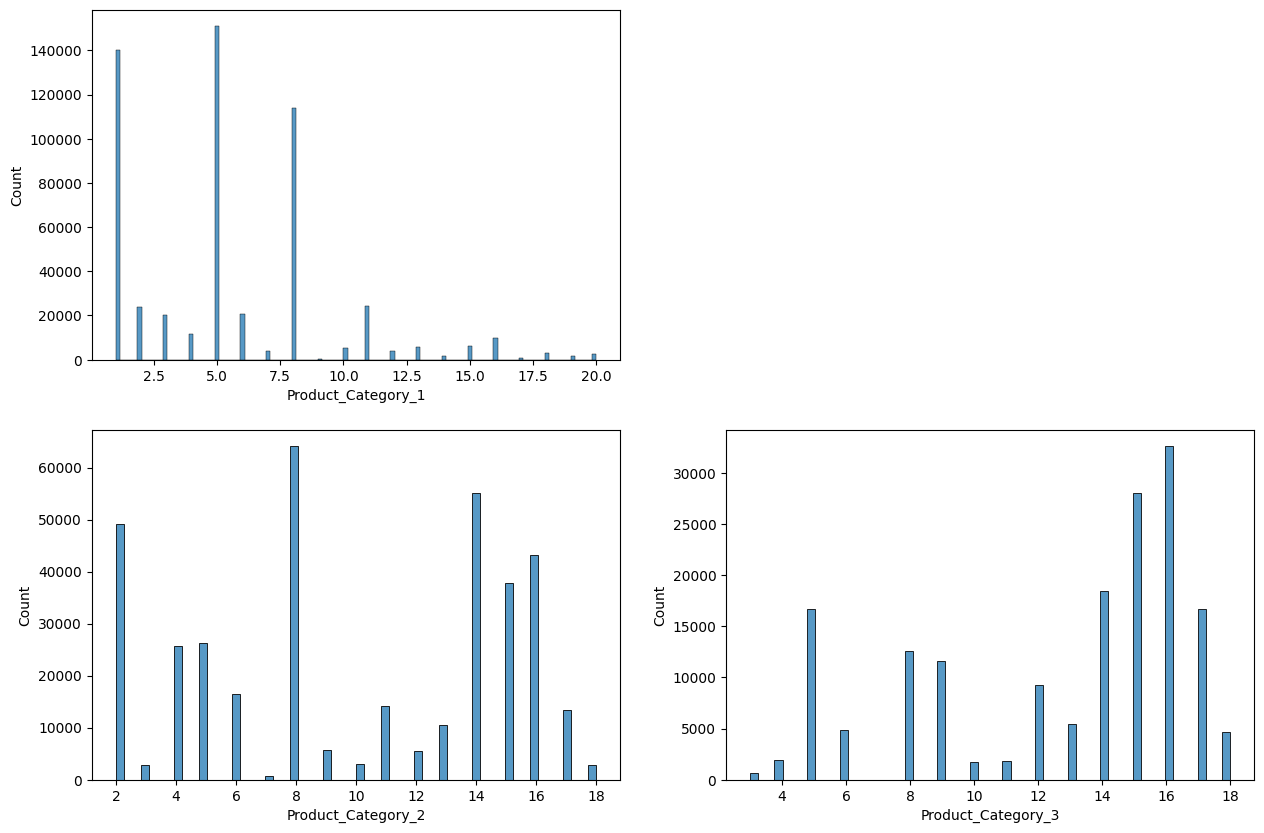

In [11]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(df["Product_Category_1"])
plt.subplot(2,2,3)
sns.histplot(df["Product_Category_2"])
plt.subplot(2,2,4)
sns.histplot(df["Product_Category_3"]);

If we look at the datacard at kaggle, we may understand the missing values. Product category 1 is the original category of the product, but category 2 and 3 are if the product belongs to some other category as well stats. Hence, NAN means that the product belongs only to one category. As a result I will fill the missing value at cat2 and cat3 as 0.

In [12]:
df["Product_Category_2"] = df["Product_Category_2"].fillna(0)
df["Product_Category_3"] = df["Product_Category_3"].fillna(0)

* We got rid of the nan values with 0 imputation

Now, lets deal with the categorical columns: Age, Gender, City Category, Year at Current City

<Axes: xlabel='Age', ylabel='Count'>

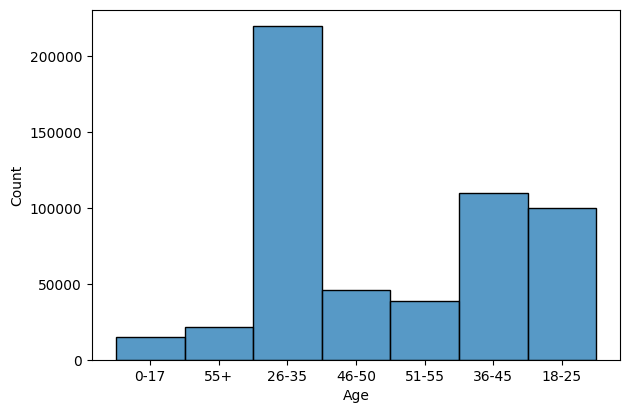

In [13]:
#Visualize the Age
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(df["Age"])

* Here we see that nearly half of the purchase comes from middle-aged customers
* After bivariate analysis, we can group some ranges and decrease the number of categories

<Axes: xlabel='Gender', ylabel='Count'>

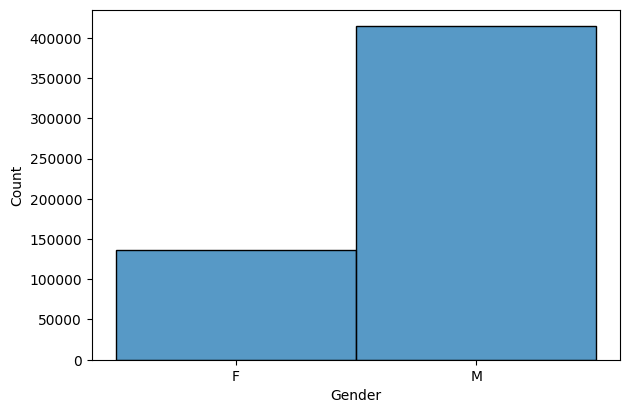

In [14]:
#Visualize Gender
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(df["Gender"])

* Surprising result is that males tend to shop more in terms of quantity!

<Axes: xlabel='City_Category', ylabel='Count'>

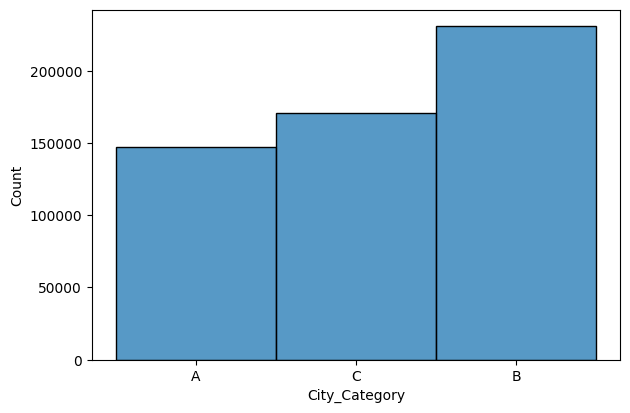

In [15]:
#Visualize City Category
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(df["City_Category"])

* Seems good in terms of distribution

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='Count'>

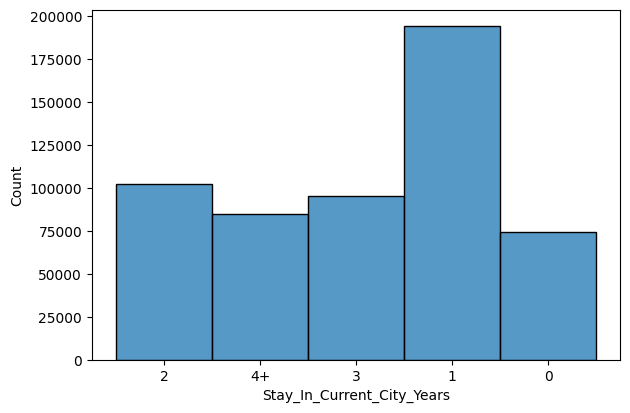

In [16]:
#Visualize Lived Current City
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(df["Stay_In_Current_City_Years"])

* Again, similar values for each bin

Now, lets move on to numeric features: User id, product id, occupation, marital stat, product category 1, product category 2, product category 3, purchase

<Axes: xlabel='User_ID', ylabel='Count'>

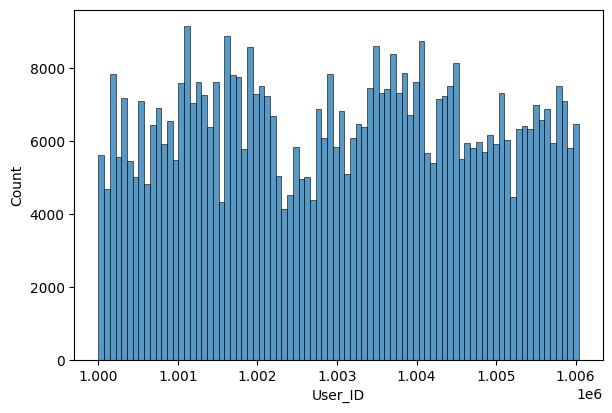

In [17]:
#Lets visualize user id
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(df["User_ID"])

This much variablity in the x axis is not desired. Hence I will try to cluster the user id's as most, mid and low buyers

In [18]:
#Cluster user_id's
df["User_ID"] = df["User_ID"].astype(str)

In [19]:
#look at the total purhcase by user id
user_purchase = df.groupby("User_ID")["Purchase"].sum()
user_purchase.sort_values(ascending=False)

User_ID
1004277    10536909
1001680     8699596
1002909     7577756
1001941     6817493
1000424     6573609
             ...   
1004991       52371
1005117       49668
1003883       49349
1000094       49288
1004464       46681
Name: Purchase, Length: 5891, dtype: int64

We have 5891 users currently in the system.

<Axes: ylabel='Purchase'>

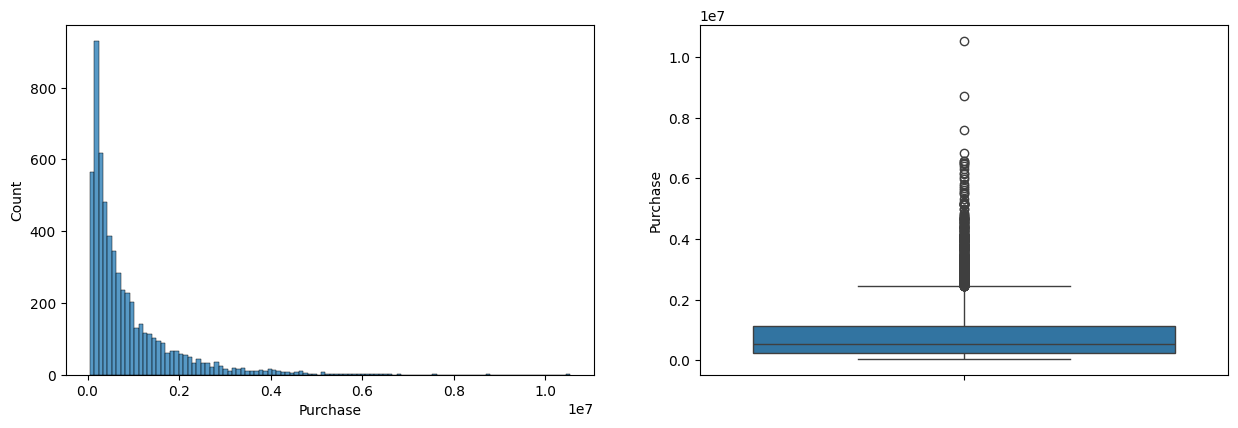

In [20]:
#Lets try to visualize and cluster
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(user_purchase)
plt.subplot(2,2,2)
sns.boxplot(user_purchase)

There are too many outlier users in the system. We may categorize them as outlier buyers and show ads accordingly or we can apply a log transformation.

<Axes: xlabel='Purchase', ylabel='Count'>

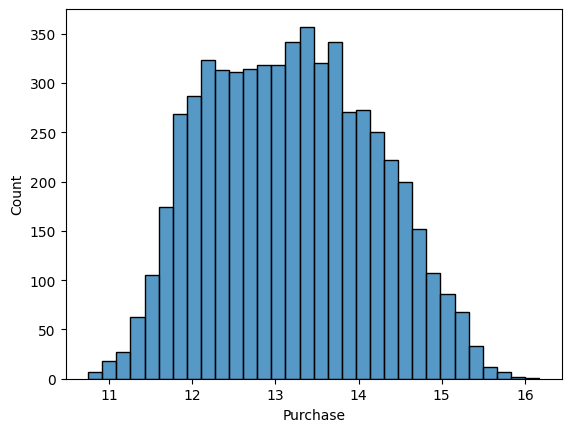

In [21]:
sns.histplot(np.log(user_purchase))

It seems much better in terms of distribution.

In [22]:
df_users = pd.DataFrame(columns = ["User_ID","Total_Purchase","Log_Total_Purchase"])
df_users["User_ID"] = user_purchase.index
df_users["Total_Purchase"] = user_purchase.values
df_users["Log_Total_Purchase"] = np.log(user_purchase.values)

In [23]:
df_users.head()

,User_ID,Total_Purchase,Log_Total_Purchase
0,1000001,334093,12.719175
1,1000002,810472,13.605372
2,1000003,341635,12.741498
3,1000004,206468,12.237901
4,1000005,821001,13.618280


Here we have another table for existing users related to their purchase amounts

In [24]:
#Lets look at the prod. categories
df.groupby("Product_Category_1")["Purchase"].sum().sort_values(ascending=False)

Product_Category_1
1     1910013754
5      941835229
8      854318799
6      324150302
2      268516186
3      204084713
16     145120612
11     113791115
10     100837301
15      92969042
7       60896731
4       27380488
14      20014696
18       9290201
9        6370324
17       5878699
12       5331844
13       4008601
20        944727
19         59378
Name: Purchase, dtype: int64

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

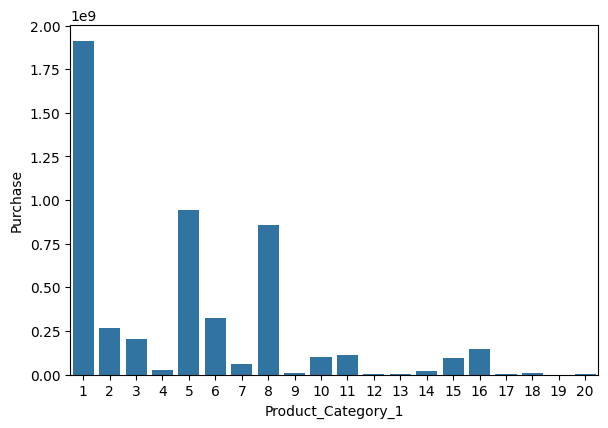

In [25]:
#Lets look at categorywise total purchase amounts
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(df.groupby("Product_Category_1")["Purchase"].sum())

As we can see from the barplot above, category 1 is top selling while 5 and 8 shows similar selling but not much as category 1. Lastly, 2,3,6,10,11,15,16 performs a little less but again similar. 4,7,9,12,13,14,17,18,19,20 is the least selling product types.

In [26]:
#Again 20 category is too much, I will cluster it into 4, top selling, selling, less selling, not selling
top_selling = [1]
selling = [5,8]
less_selling = [2,3,6,10,11,15,16]
not_selling = [4,7,9,12,13,14,17,18,19,20]

In [27]:
df_categories = pd.DataFrame(columns = ["Product_Category_1","Selling"])
df_categories["Product_Category_1"] = df["Product_Category_1"].unique()
df_categories["Selling"] = "Nan"
df_categories.loc[df_categories["Product_Category_1"].isin(top_selling),"Selling"] = "Top Selling"
df_categories.loc[df_categories["Product_Category_1"].isin(selling),"Selling"] = "Selling"
df_categories.loc[df_categories["Product_Category_1"].isin(less_selling),"Selling"] = "Less Selling"
df_categories.loc[df_categories["Product_Category_1"].isin(not_selling),"Selling"] = "Not Selling"

In [28]:
df_categories.head()

,Product_Category_1,Selling
0,3,Less Selling
1,1,Top Selling
2,12,Not Selling
3,8,Selling
4,5,Selling


In [29]:
#Lets merge df_categories with df
df = df.merge(df_categories, on = "Product_Category_1", how = "left")

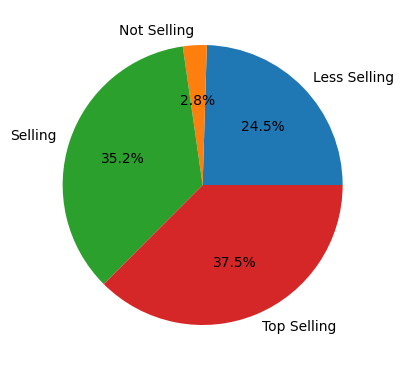

In [30]:
#Lets also look at the pie chart on purchase amount according to label
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.pie(df.groupby("Selling")["Purchase"].sum(),labels=df.groupby("Selling")["Purchase"].sum().index,autopct="%1.1f%%");

Not surprising hah!

We have another table for product categories now.

In [31]:
#Lets drop product id column
df = df.drop("Product_ID",axis=1)

<Axes: xlabel='Marital_Status', ylabel='count'>

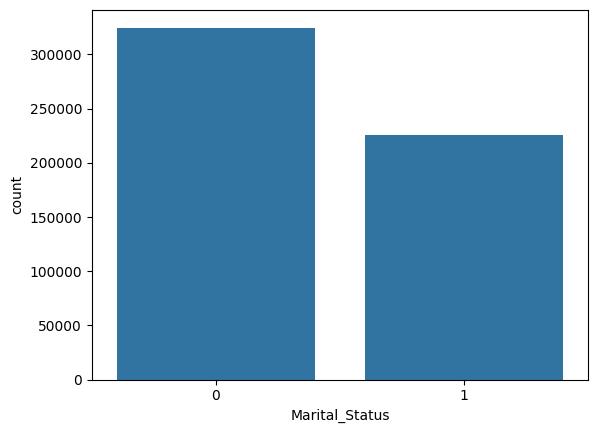

In [32]:
#Lets look at the marital status
sns.barplot(df["Marital_Status"].value_counts())

Unmarried customers seems to shop more in quantity!

<Axes: xlabel='Purchase', ylabel='Count'>

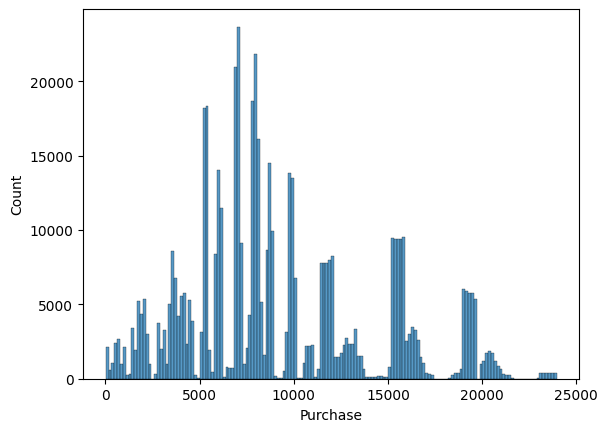

In [33]:
#Lastly lets look at the purchases
sns.histplot(df["Purchase"])

In [34]:
#lets apply a shapiro test to see if purchase is distributed normally
from scipy.stats import shapiro
shapiro(df["Purchase"])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.952629029750824, pvalue=0.0)

As Shapiro test suggests, purchase is distributed normally

<Axes: ylabel='Purchase'>

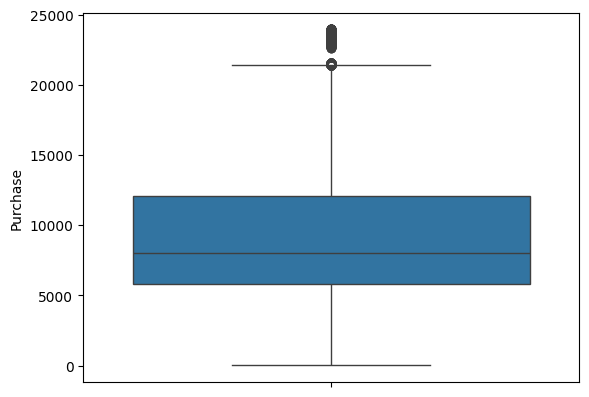

In [35]:
#Lets look at the outliers
sns.boxplot(df["Purchase"])

In [36]:
#lets look at the outliers
df[df["Purchase"] > df["Purchase"].quantile(1-0.01)].count()

User_ID                       5492
Gender                        5492
Age                           5492
Occupation                    5492
City_Category                 5492
Stay_In_Current_City_Years    5492
Marital_Status                5492
Product_Category_1            5492
Product_Category_2            5492
Product_Category_3            5492
Purchase                      5492
Selling                       5492
dtype: int64

In [37]:
#I dont like outliers
df = df[df["Purchase"] < df["Purchase"].quantile(1-0.01)]

<Axes: ylabel='Purchase'>

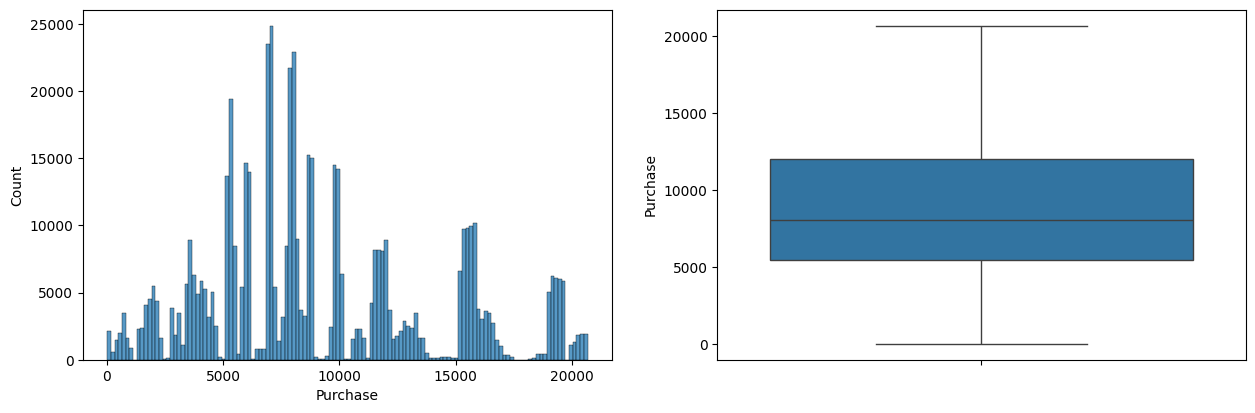

In [38]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(df["Purchase"])
plt.subplot(2,2,2)
sns.boxplot(df["Purchase"])

Much better :)

## Bivariate Statistics

In [39]:
df.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Selling
0,1000001,F,0-17,10,A,2,0,3,0.0,0.0,8370,Less Selling
1,1000001,F,0-17,10,A,2,0,1,6.0,14.0,15200,Top Selling
2,1000001,F,0-17,10,A,2,0,12,0.0,0.0,1422,Not Selling
3,1000001,F,0-17,10,A,2,0,12,14.0,0.0,1057,Not Selling
4,1000002,M,55+,16,C,4+,0,8,0.0,0.0,7969,Selling


In [40]:
#Lets make an anova test to see if this much category is needed
def barplots(dataframe, label, target):
    from scipy import stats
    """
    Takes dataframe, feature and target as parameter
    Applies t-tests for categorical features
    Returns a barpot with t-stat and p values"""
    ttests = []
    string = "Categories  t stat  p value \n "
    if pd.api.types.is_numeric_dtype(dataframe[label]) == False and len(dataframe[label].unique()) <= 20 and len(dataframe[label].unique())>=2:
        e_types = dataframe[label].unique()
        for i, e in enumerate(e_types):
            for i2, e2 in enumerate(e_types):
                if i2 >= i :
                    g1 = dataframe[dataframe[label] == e][target]
                    g2 = dataframe[dataframe[label] == e2][target]
                    t, p = stats.ttest_ind(g1,g2)
                    ttests.append([f"{e} - {e2}", t, p])
                    string += (f"{e} - {e2}: {t:.4f}, {p:.5f} " + " \n ")
                    if p < 0.05:
                        string += "Significant" + "\n"
                    else:
                        string += "Not Significant" + "\n"
        plt.figure()
        plt.figsize=(10,6)
        plt.text(5, 0.1, string, fontsize = 8)
        viz = sns.barplot(data = dataframe, x = label , y = target,)
        viz.set_xticklabels(viz.get_xticklabels(), rotation = 90)
        viz.set(title = f"{target} by {label}")
        plt.show()

<ipython-input-40-8bf59eebb334>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  viz.set_xticklabels(viz.get_xticklabels(), rotation = 90)


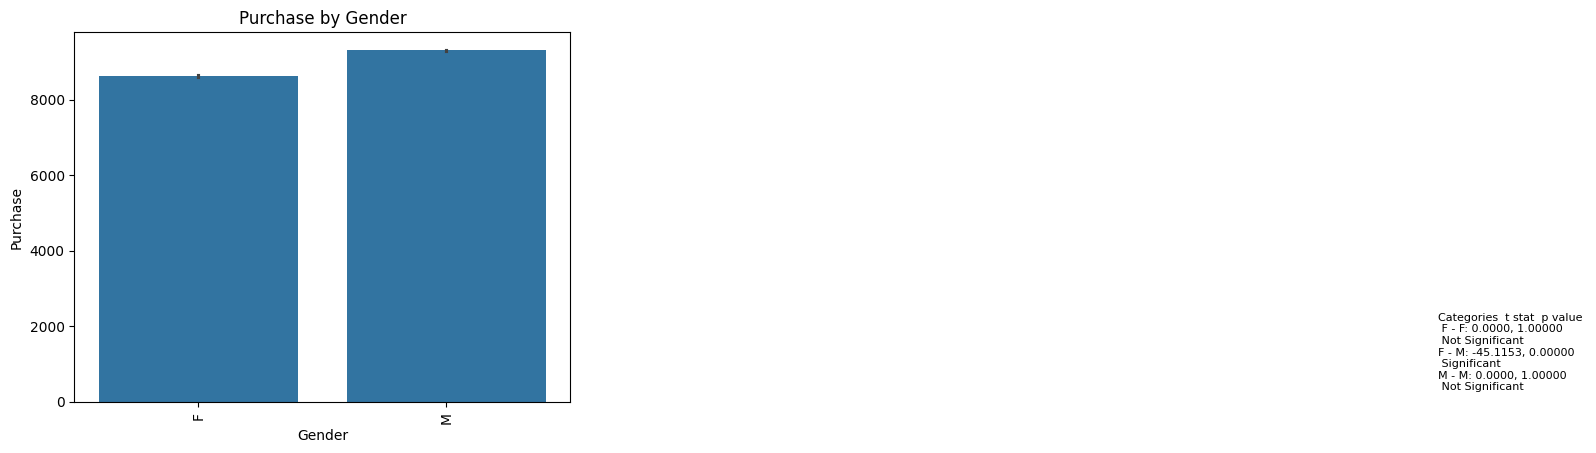

In [41]:
barplots(df, "Gender", "Purchase")

t test suggests a significance although barplot does not seem very different

<ipython-input-40-8bf59eebb334>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  viz.set_xticklabels(viz.get_xticklabels(), rotation = 90)


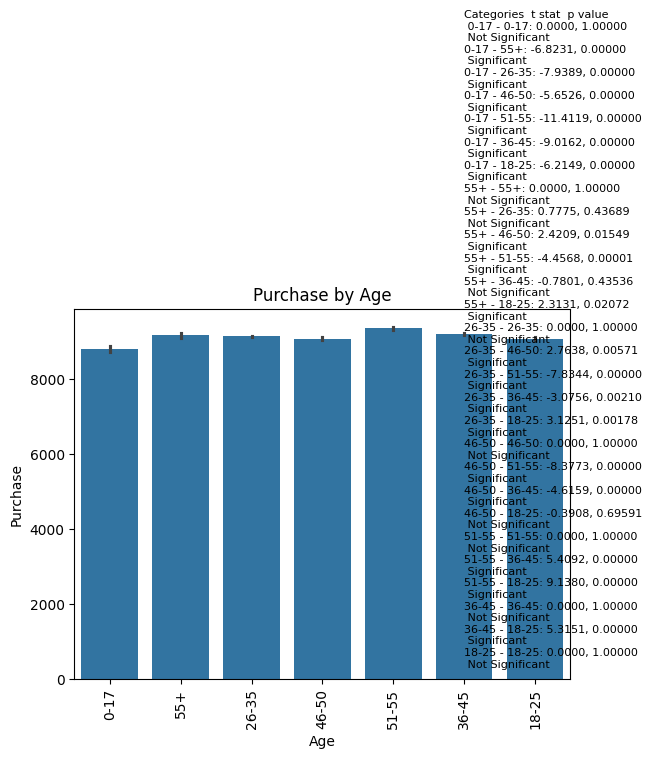

In [42]:
barplots(df, "Age", "Purchase")

We also observe significance between 2 age bins mostly.
* 55+ has no significance among the others

In [43]:
group_1 = ["0-17","46-50"]
group_2 = ["55+","26-35","36-45"]
group_3 = ["51-55"]
group_4 = ["18-25"]

In [44]:
df["Age_Group"] = "NaN"

In [45]:
df.loc[df["Age"].isin(group_1),"Age_Group"] = "Group 1"
df.loc[df["Age"].isin(group_2),"Age_Group"] = "Group 2"
df.loc[df["Age"].isin(group_3),"Age_Group"] = "Group 3"
df.loc[df["Age"].isin(group_4),"Age_Group"] = "Group 4"

In [46]:
df.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Selling,Age_Group
0,1000001,F,0-17,10,A,2,0,3,0.0,0.0,8370,Less Selling,Group 1
1,1000001,F,0-17,10,A,2,0,1,6.0,14.0,15200,Top Selling,Group 1
2,1000001,F,0-17,10,A,2,0,12,0.0,0.0,1422,Not Selling,Group 1
3,1000001,F,0-17,10,A,2,0,12,14.0,0.0,1057,Not Selling,Group 1
4,1000002,M,55+,16,C,4+,0,8,0.0,0.0,7969,Selling,Group 2


<ipython-input-40-8bf59eebb334>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  viz.set_xticklabels(viz.get_xticklabels(), rotation = 90)


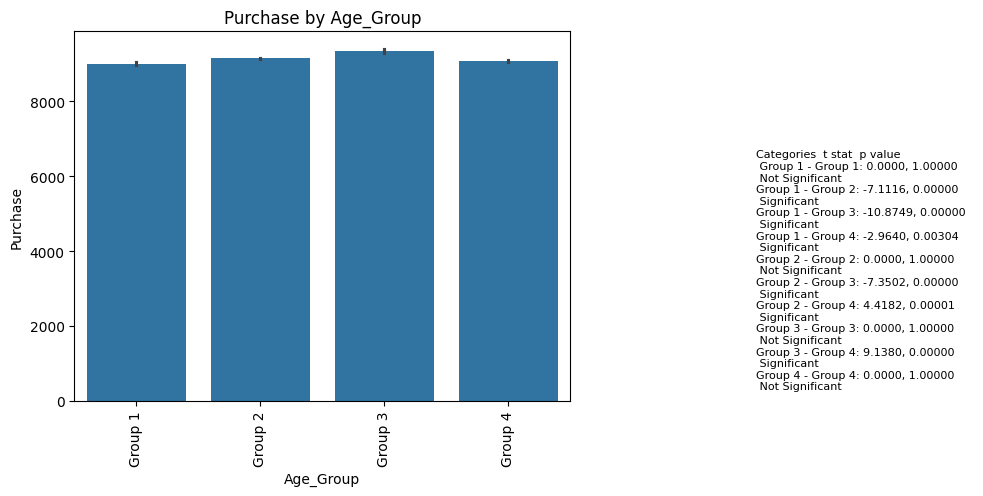

In [47]:
barplots(df, "Age_Group", "Purchase")

Now all of the features are significant

<ipython-input-40-8bf59eebb334>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  viz.set_xticklabels(viz.get_xticklabels(), rotation = 90)


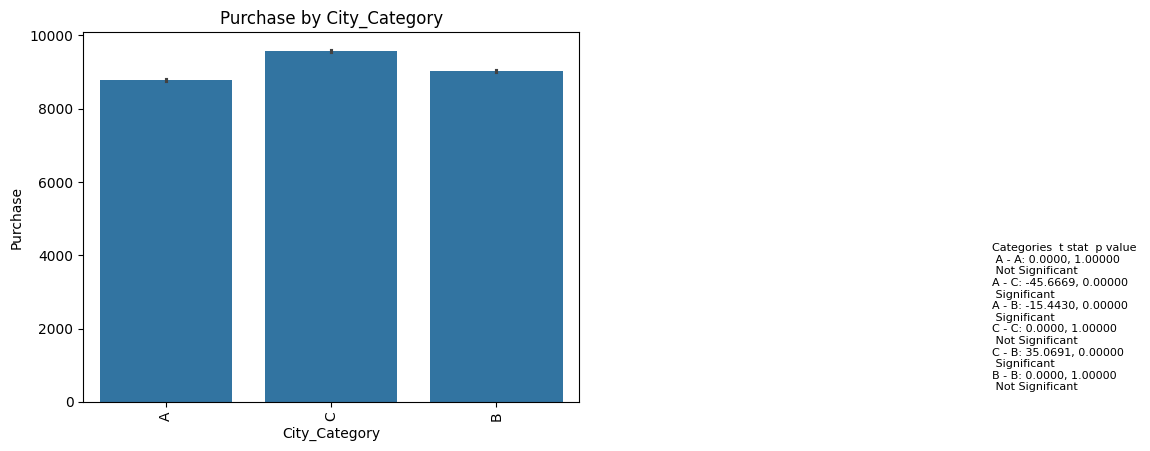

In [48]:
barplots(df, "City_Category", "Purchase")

t tests suggests city category has significant effect on purchase

<ipython-input-40-8bf59eebb334>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  viz.set_xticklabels(viz.get_xticklabels(), rotation = 90)


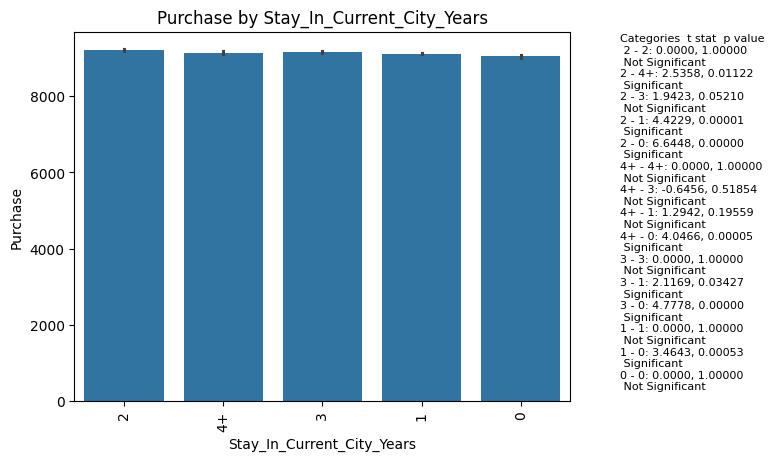

In [49]:
barplots(df, "Stay_In_Current_City_Years", "Purchase")

In [50]:
#Again I will group according to t scores
group_1 = ["2","3"]
group_2 = ["1","4+"]
group_3 =["0"]

In [51]:
df["Stay_In_Current_City_Group"] = "nan"
df.loc[df["Stay_In_Current_City_Years"].isin(group_1),"Stay_In_Current_City_Group"] = "group_1"
df.loc[df["Stay_In_Current_City_Years"].isin(group_2),"Stay_In_Current_City_Group"] = "group_2"
df.loc[df["Stay_In_Current_City_Years"].isin(group_3),"Stay_In_Current_City_Group"] = "group_3"

<ipython-input-40-8bf59eebb334>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  viz.set_xticklabels(viz.get_xticklabels(), rotation = 90)


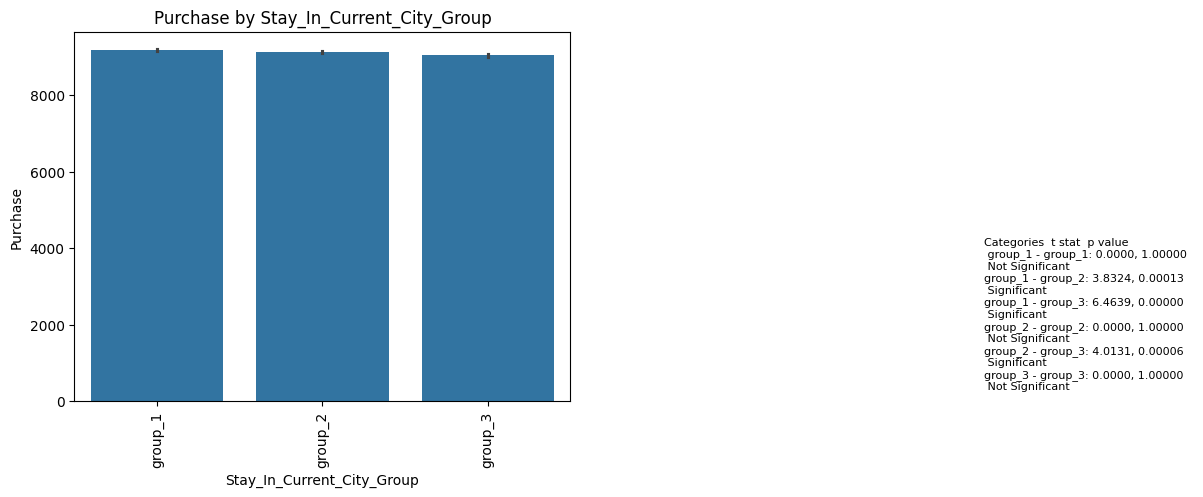

In [52]:
barplots(df, "Stay_In_Current_City_Group", "Purchase")

Seems better

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 544565 entries, 0 to 550067
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     544565 non-null  object 
 1   Gender                      544565 non-null  object 
 2   Age                         544565 non-null  object 
 3   Occupation                  544565 non-null  int64  
 4   City_Category               544565 non-null  object 
 5   Stay_In_Current_City_Years  544565 non-null  object 
 6   Marital_Status              544565 non-null  int64  
 7   Product_Category_1          544565 non-null  int64  
 8   Product_Category_2          544565 non-null  float64
 9   Product_Category_3          544565 non-null  float64
 10  Purchase                    544565 non-null  int64  
 11  Selling                     544565 non-null  object 
 12  Age_Group                   544565 non-null  object 
 13  Stay_In_Current_Cit

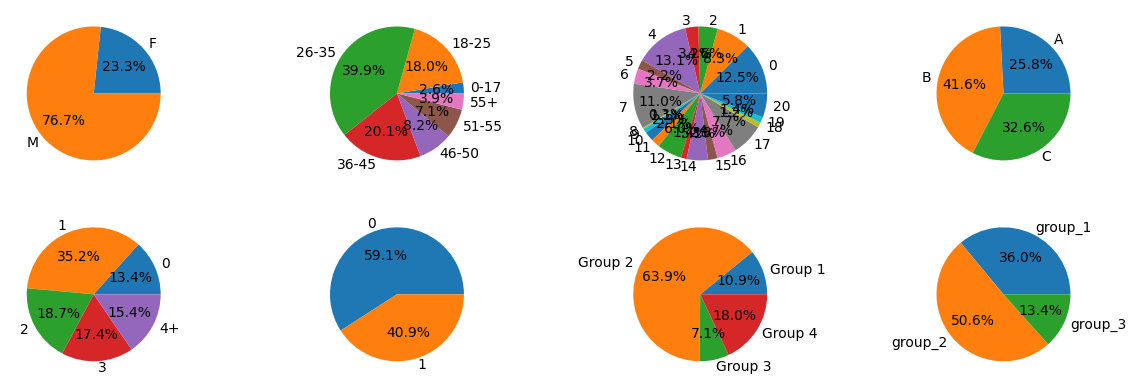

In [54]:
#Lets create pie charts for the categorical columns:Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Age_Group, Stay_In_Current_City_Group
plt.figure(figsize=(15,10))
plt.subplot(4,4,1)
plt.pie(df.groupby("Gender")["Purchase"].sum(),labels=df.groupby("Gender")["Purchase"].sum().index,autopct="%1.1f%%");
plt.subplot(4,4,2)
plt.pie(df.groupby("Age")["Purchase"].sum(),labels=df.groupby("Age")["Purchase"].sum().index,autopct="%1.1f%%");
plt.subplot(4,4,3)
plt.pie(df.groupby("Occupation")["Purchase"].sum(),labels=df.groupby("Occupation")["Purchase"].sum().index,autopct="%1.1f%%");
plt.subplot(4,4,4)
plt.pie(df.groupby("City_Category")["Purchase"].sum(),labels=df.groupby("City_Category")["Purchase"].sum().index,autopct="%1.1f%%");
plt.subplot(4,4,5)
plt.pie(df.groupby("Stay_In_Current_City_Years")["Purchase"].sum(),labels=df.groupby("Stay_In_Current_City_Years")["Purchase"].sum().index,autopct="%1.1f%%");
plt.subplot(4,4,6)
plt.pie(df.groupby("Marital_Status")["Purchase"].sum(),labels=df.groupby("Marital_Status")["Purchase"].sum().index,autopct="%1.1f%%");
plt.subplot(4,4,7)
plt.pie(df.groupby("Age_Group")["Purchase"].sum(),labels=df.groupby("Age_Group")["Purchase"].sum().index,autopct="%1.1f%%");
plt.subplot(4,4,8)
plt.pie(df.groupby("Stay_In_Current_City_Group")["Purchase"].sum(),labels=df.groupby("Stay_In_Current_City_Group")["Purchase"].sum().index,autopct="%1.1f%%");

Observations:
* Males purchase much more than females
* 26-35 age group is the leading age bin
* Occupation type B has the most purchases
* People who comes in newly and stays 1 year in a city tends to buy more(new furniture, staff maybe). 0 years probably not very much into the city and will leave.
* Bekar customers are a good sign of high purchase

In [55]:
unistats(df)

,Count,Missing,Unique,Dtype,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Occupation,544565,0,21,int64,4,8.073016,0,2.0,7.0,14.0,20,6.520895,0.401004,-1.21507
Marital_Status,544565,0,2,int64,0,0.409411,0,0.0,0.0,1.0,1,0.491726,0.368454,-1.864248
Product_Category_1,544565,0,20,int64,5,5.340845,1,1.0,5.0,8.0,20,3.891064,1.044744,1.35935
Purchase,544565,0,16397,int64,7011,9134.729457,12,5481.0,8028.0,11980.0,20664,4878.577387,0.553755,-0.429758
Product_Category_2,544565,0,18,float64,0.0,6.720032,0.0,0.0,5.0,14.0,18.0,6.200302,0.314696,-1.46814
Product_Category_3,544565,0,16,float64,0.0,3.859124,0.0,0.0,0.0,8.0,18.0,6.256111,1.177795,-0.381138
User_ID,544565,0,5891,object,-,-,-,-,-,-,-,-,-,-
Gender,544565,0,2,object,-,-,-,-,-,-,-,-,-,-
Age,544565,0,7,object,-,-,-,-,-,-,-,-,-,-
City_Category,544565,0,3,object,-,-,-,-,-,-,-,-,-,-


In [56]:
#To start visualizing data, lets first see the best features in terms of explainin the variance of target
def correlation(dataframe, target):
    from scipy import stats
    """
    Takes dataframe and target feature as parameter
    Returns the correlation between numeric columns and target"""

    output_dataframe = pd.DataFrame(columns = ["Columns","P-Value","Correlation Coefficient(r)","Absolute r"])
    for col in dataframe.drop(target,axis = 1):
        try:
            if pd.api.types.is_numeric_dtype(dataframe[col]):
                r, p = stats.pearsonr(dataframe[col],dataframe[target])
                output_dataframe.loc[col] = [f"{target}-{col}",round(p,4),r,abs(r)]
            else:
                pass
        except:
            pass

    return output_dataframe.sort_values(by = ["Absolute r"],ascending = False)

correlation(df,"Purchase")

,Columns,P-Value,Correlation Coefficient(r),Absolute r
Product_Category_1,Purchase-Product_Category_1,0.0000,-0.403906,0.403906
Product_Category_3,Purchase-Product_Category_3,0.0000,0.306303,0.306303
Product_Category_2,Purchase-Product_Category_2,0.0000,0.046209,0.046209
Occupation,Purchase-Occupation,0.0000,0.020183,0.020183
Marital_Status,Purchase-Marital_Status,0.1731,-0.001846,0.001846


As we can see from the correlation, product category 1 and 2 will be helping us mostly in terms of numeric features.

# Preprocessing and Modelling

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [58]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("Purchase",axis=1), df["Purchase"], test_size=0.2, random_state=42)

## Basic model with only numeric features

In [59]:
features = ["Product_Category_1","Product_Category_2","Product_Category_3","Occupation","Marital_Status"]
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [60]:
basic_model = Pipeline([
    ("scaler",StandardScaler()),
    ("model",LinearRegression())
])

In [61]:
basic_model.fit(X_train[features],y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [62]:
basic_mae_only_numeric = mean_absolute_error(y_test,basic_model.predict(X_test[features]))
print(f"MAE: {basic_mae_only_numeric}")

MAE: 3372.452808334803


With only numeric features we are able to reach MAE=3372, bear in mind that the mean value is app. 9000

## Include Categorical Features

In [63]:
df_dummied = pd.get_dummies(df,columns=["Gender","Age","City_Category","Stay_In_Current_City_Years","Stay_In_Current_City_Group","Age_Group"],drop_first=True,dtype=int)
X_train, X_test, y_train, y_test = train_test_split(df_dummied.drop("Purchase",axis=1), df_dummied["Purchase"], test_size=0.2, random_state=42)

In [64]:
df_dummied.columns

Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'Selling',
       'Gender_M', 'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50',
       'Age_51-55', 'Age_55+', 'City_Category_B', 'City_Category_C',
       'Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2',
       'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4+',
       'Stay_In_Current_City_Group_group_2',
       'Stay_In_Current_City_Group_group_3', 'Age_Group_Group 2',
       'Age_Group_Group 3', 'Age_Group_Group 4'],
      dtype='object')

In [65]:
features_wout_news = ['Occupation', 'Marital_Status',
                      'Product_Category_1',
                      'Product_Category_2', 'Product_Category_3',
                      'Gender_M', 'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50',
                      'Age_51-55', 'Age_55+', 'City_Category_B', 'City_Category_C',
                      'Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2',
                      'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4+']

In [66]:
#Lets again look at a linear regression and compare
basic_model.fit(X_train[features_wout_news],y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [67]:
basic_model_2_with_cat = mean_absolute_error(y_test,basic_model.predict(X_test[features_wout_news]))
print(f"MAE: {basic_model_2_with_cat}")

MAE: 3368.002018684065


Not that much enhancement in terms of MAE. Since number of categorical variables are more lets try some ensemble models.

## Ensemble Methods

In [68]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [69]:
ensemble_1 = Pipeline([
    ("scaler",StandardScaler()),
    ("model",XGBRegressor())
])
ensemble_2 = Pipeline([
    ("scaler",StandardScaler()),
    ("model",RandomForestRegressor())
])

In [70]:
ensemble_1.fit(X_train[features_wout_news],y_train)
ensemble_2.fit(X_train[features_wout_news],y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestRegressor())])

In [71]:
xgboost_init_mae_with_cat = mean_absolute_error(y_test,ensemble_1.predict(X_test[features_wout_news]))
random_forest_mae_ = mean_absolute_error(y_test,ensemble_2.predict(X_test[features_wout_news]))
print(f"MAE for XGBoost: {xgboost_init_mae_with_cat}")
print(f"MAE for Random Forest: {random_forest_mae_}")

MAE for XGBoost: 2120.208235695657
MAE for Random Forest: 2190.306237655418


As waited, there is a strong enhancement from the linear regression methods. I will also try a neural network and knn regressor

## KNN Regressor

In [72]:
from sklearn.neighbors import KNeighborsRegressor

In [73]:
knn = Pipeline([
    ("scaler",StandardScaler()),
    ("model",KNeighborsRegressor())
])

In [74]:
knn.fit(X_train[features_wout_news],y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', KNeighborsRegressor())])

In [75]:
#It takes long dont run it!
knn_mae = mean_absolute_error(y_test,knn.predict(X_test[features_wout_news]))
print(f"MAE for KNN: {knn_mae}")

MAE for KNN: 2534.2727608274495


Better than linear regression worst than boosting methods.

## With New Features

In [76]:
features_new = ['Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3',
       'Gender_M', 'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50',
       'Age_51-55', 'Age_55+', 'City_Category_B', 'City_Category_C',
       'Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2',
       'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4+',
       'Stay_In_Current_City_Group_group_2',
       'Stay_In_Current_City_Group_group_3', 'Age_Group_Group 2',
       'Age_Group_Group 3', 'Age_Group_Group 4']

In [77]:
df_new = df_dummied.copy()
df_new = df_new.merge(df_users, on = "User_ID", how = "left")
df_new = pd.get_dummies(df_new,columns=["Selling"],drop_first=True,dtype=int)
X_train, X_test, y_train, y_test = train_test_split(df_new.drop("Purchase",axis=1), df_new["Purchase"], test_size=0.2, random_state=42)

In [78]:
ensemble_1.fit(X_train[features_new],y_train)
ensemble_2.fit(X_train[features_new],y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestRegressor())])

In [79]:
xgb_new_mae = mean_absolute_error(y_test,ensemble_1.predict(X_test[features_new]))
randomforest_new_mae = mean_absolute_error(y_test,ensemble_2.predict(X_test[features_new]))
print(f"MAE for XGBoost: {xgb_new_mae}")
print(f"MAE for Random Forest: {randomforest_new_mae}")

MAE for XGBoost: 2118.231347057085
MAE for Random Forest: 2189.1722771258865


## Neural Network

In [ ]:
from tensorflow import keras

In [81]:
nn = keras.Sequential([
    keras.layers.Dense(5,activation="relu"),
    keras.layers.Dense(5,activation="relu"),
    keras.layers.Dense(1)
])

In [82]:
nn.compile(optimizer="adam",loss="mean_absolute_error")

In [83]:
nn.fit(X_train[features_new],y_train,epochs=50)

Epoch 1/50
 6333/13615 [============>.................] - ETA: 15s - loss: 4846.0791

KeyboardInterrupt: 

In [ ]:
nn_mae = mean_absolute_error(y_test,nn.predict(X_test[features_new]))
print(f"MAE for Neural Network: {nn_mae}")

It takes so much time and I think its converged, our loss here is app. 2834 on training data.

## Hyperparamaeter Optimization for XGBoost

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
learning_rate = np.linspace(0.05,0.3,10)
max_depth = [5,6,7,8,9,10]

In [86]:
from re import X
grid_search = GridSearchCV(XGBRegressor(),
                           param_grid = {
                               "eta":learning_rate,
                               "max_depth":max_depth},
                           cv = 5,
                           scoring = "neg_mean_absolute_error")

In [87]:
#lets create a pipeline with grid search
pipeline = Pipeline([
    ("scaler",StandardScaler()),
    ("model",grid_search),
])

In [88]:
pipeline.fit(X_train[features_new],y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 GridSearchCV(cv=5,
                              estimator=XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     device=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=None,
                                                     gamma=None,
                                                     grow_policy=None,
                                                     importance_type=N...
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...),
                              param_grid={'eta': array([0.05      , 0.07777778, 0.10555556, 0.13333333, 0.16111111,
       0.18888889, 0.21666667, 0.24444444, 0.27222222, 0.3       ]),
                                          'max_depth': [5, 6, 7, 8, 9, 10]},
                              scoring='neg_mean_absolute_error'))])

In [89]:
optimized_xgb_mae = mean_absolute_error(y_test,pipeline.predict(X_test[features_new]))

In [90]:
pipeline.fit(X_train[features],y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 GridSearchCV(cv=5,
                              estimator=XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     device=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=None,
                                                     gamma=None,
                                                     grow_policy=None,
                                                     importance_type=N...
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...),
                              param_grid={'eta': array([0.05      , 0.07777778, 0.10555556, 0.13333333, 0.16111111,
       0.18888889, 0.21666667, 0.24444444, 0.27222222, 0.3       ]),
                                          'max_depth': [5, 6, 7, 8, 9, 10]},
                              scoring='neg_mean_absolute_error'))])

In [91]:
optimized_xgb_wout_news = mean_absolute_error(y_test,pipeline.predict(X_test[features]))

Here after trying out many values regarding max depth, learning rate, gamma. I have reached to a MAE=2090 with newly added features.

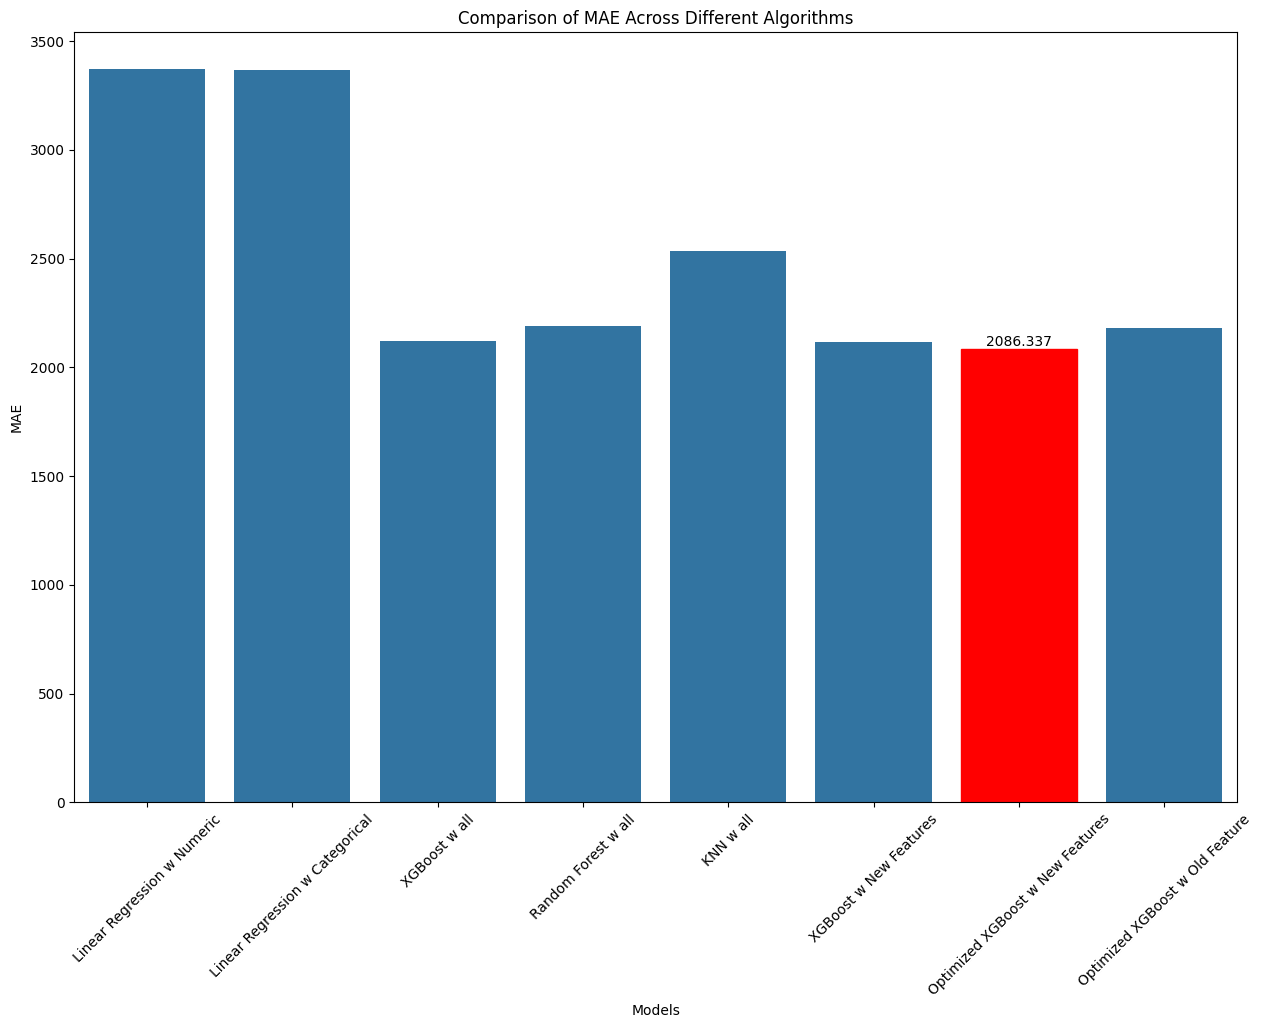

In [97]:
#lets create a bar plot to compare
maes = [basic_mae_only_numeric,basic_model_2_with_cat,xgboost_init_mae_with_cat,random_forest_mae_,knn_mae,xgb_new_mae,optimized_xgb_mae,optimized_xgb_wout_news]#nn_mae]
models = ["Linear Regression w Numeric","Linear Regression w Categorical","XGBoost w all","Random Forest w all","KNN w all","XGBoost w New Features","Optimized XGBoost w New Features","Optimized XGBoost w Old Feature"]#,"Neural Network w all"]
min_mae_index = maes.index(min(maes))
min_mae_value = min(maes)
plt.figure(figsize=(15, 10))
sns.barplot(x=models, y=maes)

# Highlight the bar with the lowest MAE
bars = plt.gca().patches
bars[min_mae_index].set_color('red')

# Annotate the minimum MAE value
plt.text(min_mae_index, min_mae_value + 0.005, f'{min_mae_value:.3f}', ha='center', va='bottom', color='black')

# Add titles and labels
plt.xticks(rotation=45)
plt.title("Comparison of MAE Across Different Algorithms")
plt.xlabel("Models")
plt.ylabel("MAE")

plt.show()